Carga de Bibliotecas

In [1]:

import pandas as pd
import requests
from bs4 import BeautifulSoup


Carga de dados

In [2]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content


Requisição bem sucedida!


Tabulação de dados

In [3]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

DataFrame Pandas

In [5]:
table_str = str(table)
df = pd.read_html(table_str)[0]

Atuacao nos dados

In [6]:
table = soup.find(name='table', attrs={'id':'confs_standings_W'})

Dados de duas temporadas

In [39]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


Limpeza Inicial

In [32]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

Conversao Valores

In [33]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

Importanto biblioteca para grafico

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

Gerando grafico

<AxesSubplot:xlabel='Year', ylabel='3P'>

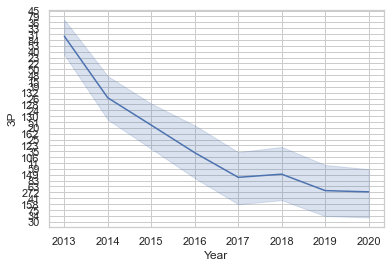

In [41]:
df.reset_index(inplace=True)
sns.lineplot(x='Year', y='3P', data=df)

Top 5 arremessos

In [18]:
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player', '3P', 'Year']].head()

,Player,3P,Year
121,Stephen Curry,402,2016
124,Stephen Curry,324,2017
140,Stephen Curry,286,2015
123,Stephen Curry,272,2013
543,Klay Thompson,268,2017


Adição de mais alguns elementos

In [19]:
grouped_df = df.groupby('Player', as_index=False).sum()
sorted_df = grouped_df.sort_values(by=['3P'], axis=0, ascending=False)
sorted_df[['Player', '3P', '3PA']].head()

,Player,3P,3PA
792,Stephen Curry,1496,3422
369,James Harden,1327,3659
530,Kyle Korver,1241,2746
517,Klay Thompson,1170,2774
170,Damian Lillard,1051,2893
